In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 

In [109]:
file_path = 'SmartFarmingCropYield.csv'

dataset = pd.read_csv(file_path)

# Análisis exploratorio de datos (EDA)

In [110]:
#Creamos copia del dataset original
df = dataset.copy()

#Renombramos las columnas para que no comiencen con un espacio
df.columns = df.columns.str.strip().str.replace(" ", "")

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
2,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,Aspersor,Inorganico,45.43,93,4503.82,0.88,Leve
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,NaN,Mixto,16.58,128,4203.51,0.65,Severo
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organico,5.05,104,3708.54,0.85,Severo
309,Soja,38.61,6.20,17.08,279.06,73.09,9.60,Goteo,Organico,43.78,131,2586.36,0.77,Severo


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipoCultivo                311 non-null    object 
 1   humedadSuelo(%)            311 non-null    float64
 2   pHSuelo                    311 non-null    float64
 3   temperatura(°C)            311 non-null    float64
 4   precipitacion(mm)          311 non-null    float64
 5   humedad(%)                 311 non-null    float64
 6   horasLuzSolar              311 non-null    float64
 7   tipoRiego                  220 non-null    object 
 8   tipoFertilizante           311 non-null    object 
 9   mlPesticida                311 non-null    float64
 10  diasTotales                311 non-null    int64  
 11  rendimientoKg_hectarea     311 non-null    float64
 12  indiceNDVI                 311 non-null    float64
 13  estadoEnfermedadesCultivo  228 non-null    object 

**Valores faltantes o duplicados**

In [112]:
df.duplicated().values.any()


np.False_

In [113]:
df.isna().sum()

tipoCultivo                   0
humedadSuelo(%)               0
pHSuelo                       0
temperatura(°C)               0
precipitacion(mm)             0
humedad(%)                    0
horasLuzSolar                 0
tipoRiego                    91
tipoFertilizante              0
mlPesticida                   0
diasTotales                   0
rendimientoKg_hectarea        0
indiceNDVI                    0
estadoEnfermedadesCultivo    83
dtype: int64

In [114]:
df[df.isna().any(axis=1)]

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN
8,Maiz,42.43,7.07,20.70,224.15,76.53,8.70,NaN,Organico,13.55,127,4942.95,0.65,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Soja,40.46,7.44,18.31,237.68,59.21,8.68,NaN,Mixto,17.22,100,4287.59,0.77,Severo
305,Soja,19.06,7.20,20.93,117.13,45.96,5.34,Aspersor,Inorganico,6.76,149,2531.89,0.79,NaN
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,NaN,Mixto,16.58,128,4203.51,0.65,Severo
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organico,5.05,104,3708.54,0.85,Severo


**Distrubuciones de las variables**

In [115]:
#Selección de columnas númericas
cols = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'diasTotales', 'rendimientoKg_hectarea', 'indiceNDVI']

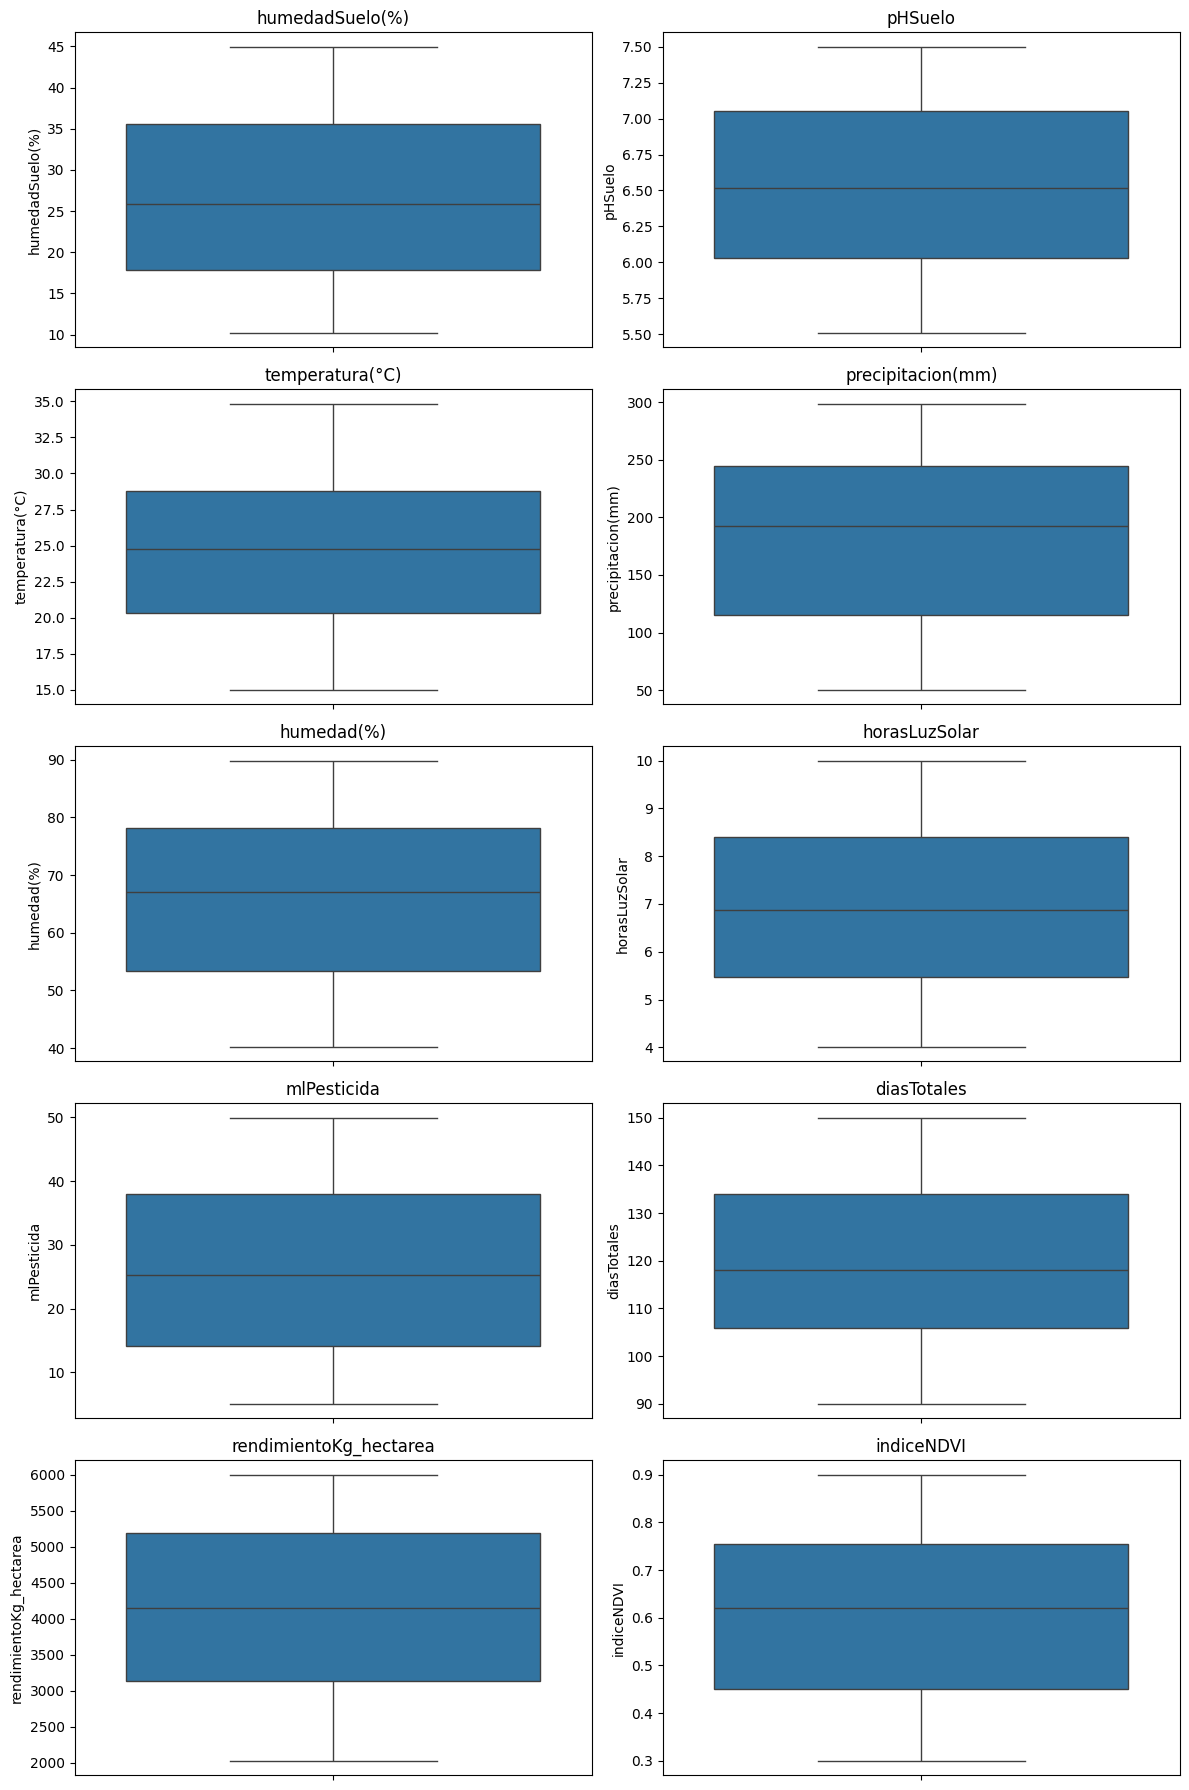

In [116]:
# Definimos el layout → 5 filas x 2 columnas = 10 subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

# Aplanamos la grilla de ejes
axes = axes.flatten()

# Iteramos
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Ajustamos diseño
plt.tight_layout()
plt.show()

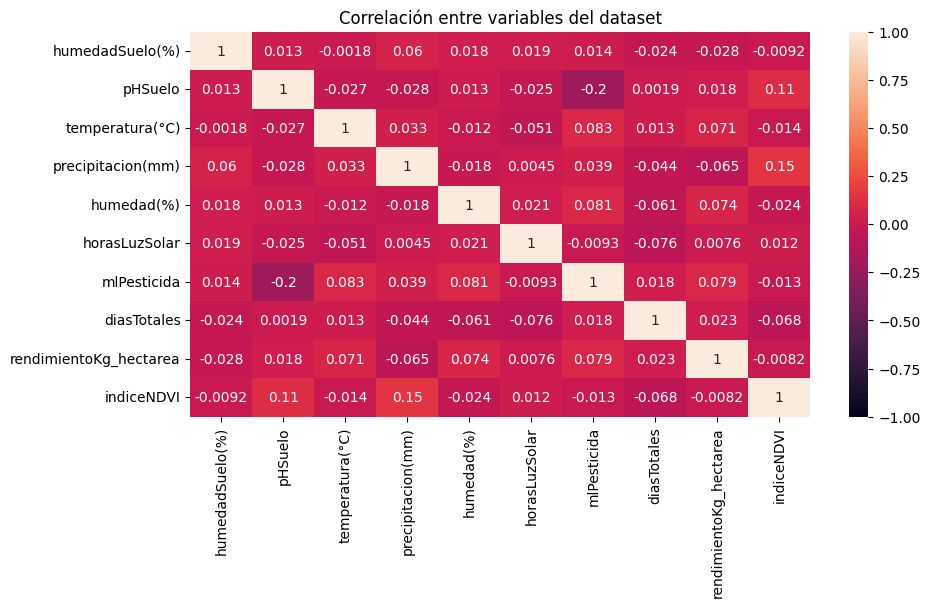

In [117]:
#Selección de columnas númericas
cols = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'diasTotales', 'rendimientoKg_hectarea', 'indiceNDVI']

plt.figure(figsize=(10,5))
sns.heatmap(df[cols].corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlación entre variables del dataset')
plt.show()

**Codificación de variables catgorícas**

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipoCultivo                311 non-null    object 
 1   humedadSuelo(%)            311 non-null    float64
 2   pHSuelo                    311 non-null    float64
 3   temperatura(°C)            311 non-null    float64
 4   precipitacion(mm)          311 non-null    float64
 5   humedad(%)                 311 non-null    float64
 6   horasLuzSolar              311 non-null    float64
 7   tipoRiego                  220 non-null    object 
 8   tipoFertilizante           311 non-null    object 
 9   mlPesticida                311 non-null    float64
 10  diasTotales                311 non-null    int64  
 11  rendimientoKg_hectarea     311 non-null    float64
 12  indiceNDVI                 311 non-null    float64
 13  estadoEnfermedadesCultivo  228 non-null    object 

In [119]:
df['estadoEnfermedadesCultivo'].value_counts()

estadoEnfermedadesCultivo
Severo      79
Leve        77
Moderate    72
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(data=df, columns=['tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo'], drop_first=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,6.34,122,4408.07,0.63,False,False,False,True,False,False
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,9.60,112,5389.98,0.58,False,False,False,False,False,False
2,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,15.26,144,2931.16,0.80,True,False,True,False,False,False
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,25.80,134,4227.80,0.44,False,False,False,True,False,False
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,39.29,145,4501.20,0.76,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,45.43,93,4503.82,0.88,False,False,False,False,False,False
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,16.58,128,4203.51,0.65,False,False,True,False,False,True
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,5.05,104,3708.54,0.85,False,False,False,True,False,True
309,Soja,38.61,6.20,17.08,279.06,73.09,9.60,43.78,131,2586.36,0.77,True,False,False,True,False,True


**Normalización de las variables**

In [122]:
X = df.drop(columns=['tipoCultivo'])
y = df['tipoCultivo']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape

(311, 16)

# PCA